### Zadanie 2
#### Przygotowanie zbioru danych

In [33]:
import pandas as pd

# Wczytujemy zbiór danych
iris_data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

# Wyświetlamy podstawowe informacje o zbiorze danych
print(iris_data.info())

# Wyświetlamy podstawowe statystyki zbioru danych
print(iris_data.describe())

# Wyświetlamy pierwsze 5 próbek ze zbioru danych
print(iris_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

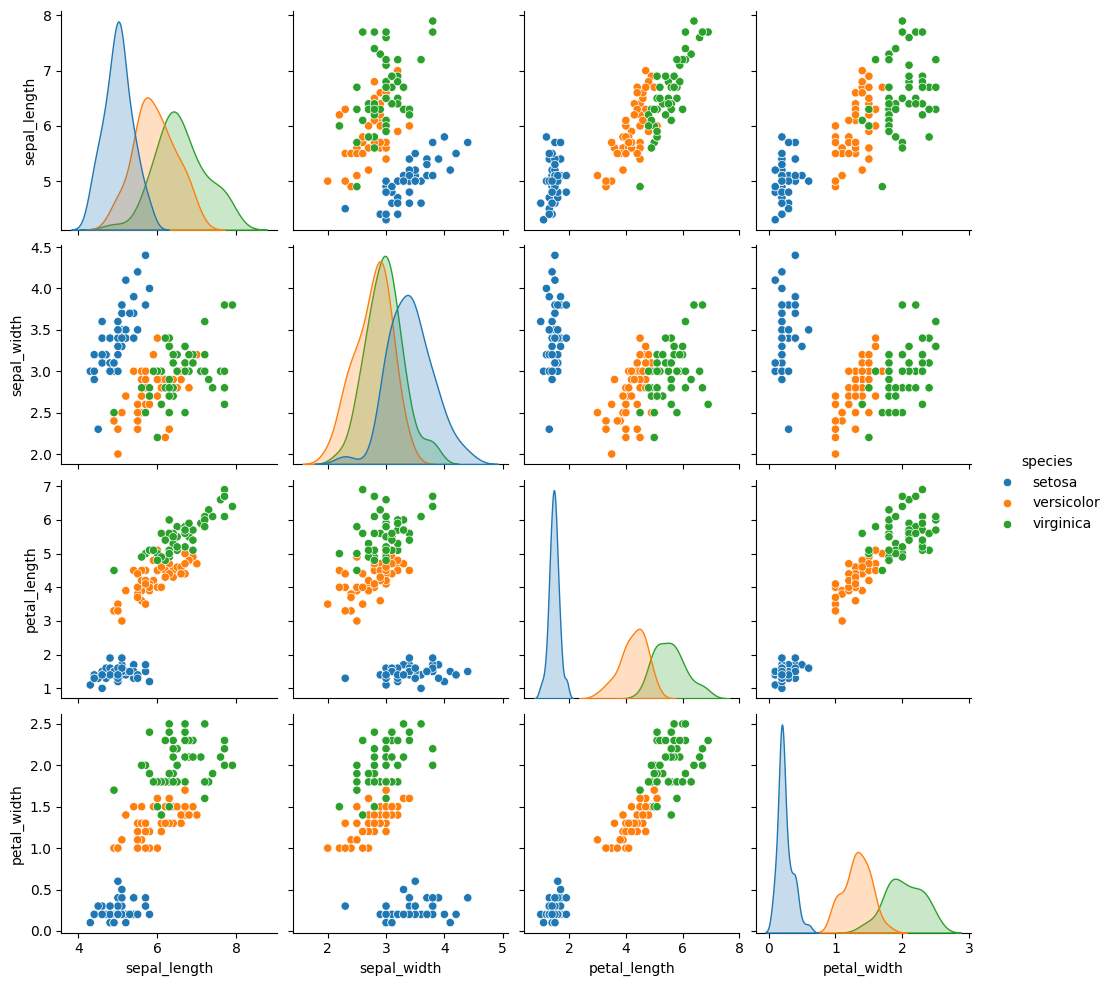

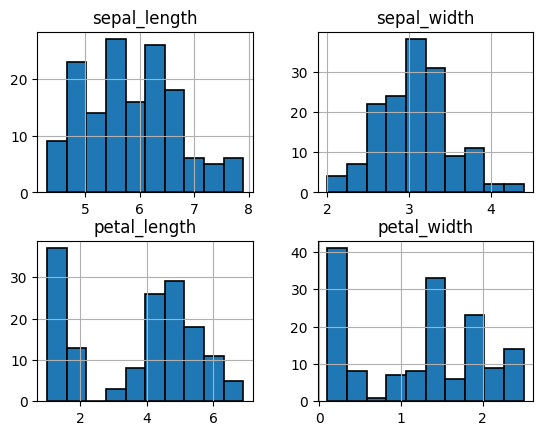

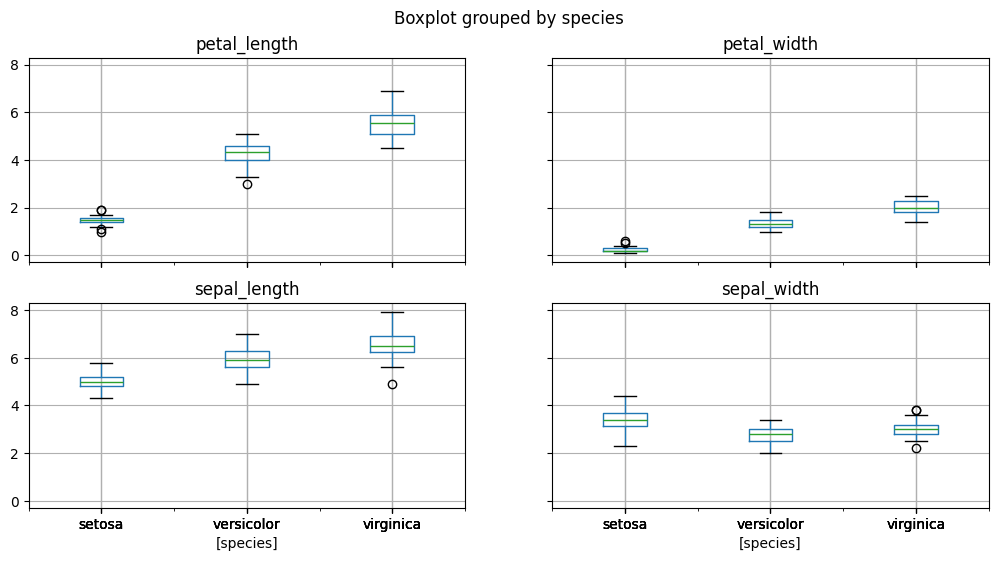

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wykres punktowy
sns.pairplot(iris_data, hue='species')
plt.show()

# Histogramy cech
iris_data.hist(edgecolor='black', linewidth=1.2)
plt.show()

# Wykresy pudełkowe
iris_data.boxplot(by='species', figsize=(12, 6))
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sprawdzamy brakujące dane
print(iris_data.isnull().sum())

# Sprawdzamy duplikaty
print(iris_data.duplicated().sum())

# Usuwamy duplikaty
iris_data = iris_data.drop_duplicates()

# Normalizacja i standaryzacja danych
scaler = StandardScaler()
iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
3


# Zadanie 3
## Przeprowadzenie klasyfikacji

Wybór modeli do klasyfikacji, minimum 3.
Może to być na przykład k-Nearest Neighbors (k-NN), Support Vector Machine (SVM), Decision Trees, Random Forest, oraz inne metody dostępne w Scikit-learn.
Przeprowadzenie treningu wybranych modeli.
Ocena skuteczności modeli na zestawie testowym, używając odpowiednich metryk np. dokładność (accuracy), macierz błędu (confusion matrix).
Optymalizacja, dostosowanie parametrów modeli, aby poprawić ich skuteczność.
Porównanie wyników różnych modeli klasyfikacji, aby wybrać ten o najlepszej wydajności.

Na koniec proszę o analizę wyników, interpretujemy, które cechy są najważniejsze dla klasyfikacji i wyciągnięcie wniosków.


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Podział danych na zbiór uczący i testowy
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species']

# Testujemy różne kombinacje podziałów danych
test_sizes = [0.1, 0.2, 0.3]
random_states = [60, 30, 5]

# Tworzymy tabelę do przechowywania wyników podziałów danych
splits_df = []

# Dla każdej kombinacji test_size i random_state tworzymy podział danych i zapisujemy go w tabeli
for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        splits_df.append({  'Test Size': test_size, 'Random State': random_state,
                            'X_train': X_train, 'X_test': X_test,
                            'y_train': y_train, 'y_test': y_test})

# Definiujemy modele
models = [KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

# Trenujemy modele
for model in models:
    print(f"\n\nTraining {model.__class__.__name__}")
    for row in splits_df:
        print(f"Test Size: {row['Test Size']}, Random State: {row['Random State']}")
        X_train, X_test, y_train, y_test = row['X_train'], row['X_test'], row['y_train'], row['y_test']
        model.fit(X_train, y_train)



Training KNeighborsClassifier
Test Size: 0.1, Random State: 60
Test Size: 0.1, Random State: 30
Test Size: 0.1, Random State: 5
Test Size: 0.2, Random State: 60
Test Size: 0.2, Random State: 30
Test Size: 0.2, Random State: 5
Test Size: 0.3, Random State: 60
Test Size: 0.3, Random State: 30
Test Size: 0.3, Random State: 5


Training SVC
Test Size: 0.1, Random State: 60
Test Size: 0.1, Random State: 30
Test Size: 0.1, Random State: 5
Test Size: 0.2, Random State: 60
Test Size: 0.2, Random State: 30
Test Size: 0.2, Random State: 5
Test Size: 0.3, Random State: 60
Test Size: 0.3, Random State: 30
Test Size: 0.3, Random State: 5


Training DecisionTreeClassifier
Test Size: 0.1, Random State: 60
Test Size: 0.1, Random State: 30
Test Size: 0.1, Random State: 5
Test Size: 0.2, Random State: 60
Test Size: 0.2, Random State: 30
Test Size: 0.2, Random State: 5
Test Size: 0.3, Random State: 60
Test Size: 0.3, Random State: 30
Test Size: 0.3, Random State: 5


In [37]:
# Ocena skuteczności modeli
for model in models:
    print(f"\n\n{model.__class__.__name__}")
    for row in splits_df:
        X_train, X_test, y_train, y_test = row['X_train'], row['X_test'], row['y_train'], row['y_test']
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(f"Test Size: {row['Test Size']}, Random State: {row['Random State']}")
        print(f"\tAccuracy:{accuracy_score(y_test, predictions)}")
        print(f"\tClassification Report:\n{classification_report(y_test, predictions)}")



KNeighborsClassifier


Test Size: 0.1, Random State: 60
	Accuracy:1.0
	Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Test Size: 0.1, Random State: 30
	Accuracy:0.8666666666666667
	Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.75      0.75      0.75         4
   virginica       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

Test Size: 0.1, Random State: 5
	Accuracy:0.8
	Classification Report:
           

# Wnioski
Po przeprowadzeniu badań okazało się, że każdy z modeli klasyfikacji osiągnął podobne wyniki, co oznacza, że dane były dobrze przygotowane do klasyfikacji. Ważnym czynnikiem okazał się parametr Random State, który miał wpływ na wyniki klasyfikacji. Przy wysokim parametrze (60), wyniki były lepsze niż przy niskim (5).